In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_excel("updateddata.xlsx")

# Data Cleanup 
- The column names were updated to them more explicit
- Values updated in variables as numerical. 'yes' updated to 1 and blanks updated to 0 as the blank represented 'no'
- As the purpose of he model is to predict the 'injury' type of Cyclist. we have filter the dataframe based on 'Cyclist' records. After applying the filter. The total observations are 
- Based on the understanding on the dataset, data irrelevant for the models are dropped
- The 'age' column is 'char' instead of numerical and indicates age as range. For ex: 20 to 30.
We have coverted this into numerical by taking mean of the range. 
- SOme of the values are 'unknown' in the 'age' columns. Those are just replaced with 'null' and will be handled in missing data handling part

- Oversampling Technique to remove Class imbalance (Performed after feature engieering)

  **--- Fill the NAs with zeroes
--- Update the Yes to 1**
for columns
*"alcohol","redlight","ag_driv","speeding","passenger","emerg_veh","trsn_city_veh"* columns


In [ ]:
cols = ["alcohol","redlight","ag_driv","speeding","passenger","emerg_veh","trsn_city_veh", \
    "truck","automobile","pedestrian"]
for col in cols:
  df[col].fillna(0,inplace=True)
  df[col].replace("Yes",1,inplace=True)

As the Analysis is based on 'Cylist' injury. Fiter the dataframe based on 'Cyclist'

In [ ]:
## df has only rows where invtype is cyclist
df=df.loc[df.invtype=='Cyclist']
df.reset_index(drop=True, inplace=True)
df.head(2)

,Unnamed: 0,event_id,year,date,hour,street1,street2,road_class,district,ward_num,division,latitude,longitude,intersection,loc_to_inter,traffic_control,visibility,light,road_cond,acclass,impactype,invtype,age,injury,fatal_no,initdir,vehtype,manoeuver,drivact,drivcond,pedtype,pedact,pedcond,cyclistype,cycact,cyccond,pedestrian,automobile,truck,trsn_city_veh,emerg_veh,passenger,speeding,ag_driv,redlight,alcohol,hood_id,neighbourhood,minute
0,2,891027,2006,2006-02-11,18,UNDERHILL DR,CASSANDRA BLVD,Collector,North York,16.0,33,43.752745,-79.32639,Intersection,At Intersection,No Control,Clear,Dark,Dry,Non-Fatal Injury,Cyclist Collisions,Cyclist,20 to 24,Major,NaN,South,Bicycle,Going Ahead,NaN,NaN,NaN,NaN,NaN,Motorist turned left across cyclists path.,NaN,NaN,0,1,0,0,0,0,0,0,0,0,45,Parkwoods-Donalda (45),4
1,5,893580,2006,2006-02-27,19,MORNINGSIDE AVE,KINGSTON RD,Major Arterial,Scarborough,NaN,43,43.770645,-79.18689,Intersection,NaN,Traffic Signal,Clear,Dark,Wet,Non-Fatal Injury,Cyclist Collisions,Cyclist,25 to 29,Major,NaN,West,Bicycle,Going Ahead,NaN,NaN,NaN,NaN,NaN,Motorist turning right on green or amber at si...,Driving Properly,Normal,0,0,0,1,0,0,0,1,0,0,136,West Hill (136),55


In [ ]:
df.columns

Index(['Unnamed: 0', 'event_id', 'year', 'date', 'hour', 'street1', 'street2',
       'road_class', 'district', 'ward_num', 'division', 'latitude',
       'longitude', 'intersection', 'loc_to_inter', 'traffic_control',
       'visibility', 'light', 'road_cond', 'acclass', 'impactype', 'invtype',
       'age', 'injury', 'fatal_no', 'initdir', 'vehtype', 'manoeuver',
       'drivact', 'drivcond', 'pedtype', 'pedact', 'pedcond', 'cyclistype',
       'cycact', 'cyccond', 'pedestrian', 'automobile', 'truck',
       'trsn_city_veh', 'emerg_veh', 'passenger', 'speeding', 'ag_driv',
       'redlight', 'alcohol', 'hood_id', 'neighbourhood', 'minute'],
      dtype='object')

In [ ]:
## Dropping Variables not needed for model
# Based on the fatality rates below are the relevant columns for the model
#'age' columns
#Date 
#hour
#Days
#Light  
#District
#Road class
#Intersection 
#Traffic signal
#Type of vehicle ('autoombile', 'truck')
#Cyclist condition ('cyccond')
cols = ['date','hour','road_class','district','intersection','traffic_control','visibility','light',\
        'age','cyccond', 'automobile', 'truck', 'injury' ]
df1= df[cols]
df1.head(1)


,date,hour,road_class,district,intersection,traffic_control,visibility,light,age,cyccond,automobile,truck,injury
0,2006-02-11,18,Collector,North York,Intersection,No Control,Clear,Dark,20 to 24,NaN,1,0,Major


In [ ]:
#create continous value for Age and drop the original columns
age = pd.DataFrame(df1['age'])
age['age'].replace(['unknown'],[''],inplace=True)
new_age = age['age'].str.split(" ", expand=True)
new_age = new_age.drop(new_age.columns[1], axis=1)
new_age = new_age.apply(pd.to_numeric, errors='coerce')
new_age['Age'] = new_age.mean(axis=1)
df1.insert(df1.columns.get_loc("age"), "New_Age", new_age['Age'])
df1.drop('age',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.head(1)

,date,hour,road_class,district,intersection,traffic_control,visibility,light,New_Age,cyccond,automobile,truck,injury
0,2006-02-11,18,Collector,North York,Intersection,No Control,Clear,Dark,22.0,NaN,1,0,Major


-------------------------------------------------------------------------------------------------

# Missing Data Handling
- Empty columns dropped
- Columns having more than 90% values as blank are dropped
- Categorical columns which had few missing data were updated as 'unknown' and kept under 'Other' category. 
- Missing numerical data in Age column updated using Multiple Imputation technique

**Analysing the Missing data**

In [ ]:
##  List the columns which has more than 90% NUll values after we filter with 'invtype' as Cyclist
cols =[]
for x in df1.columns: 
  if df1[x].isnull().sum()> 0.9*df1.shape[0]:
    print(f"Column '{x}' has more than 90% data missing")
    cols.append(x)

In [ ]:
## drop these colums with more than 90% missing data
df1.drop(cols, axis=1, inplace=True)
df1.shape
print("Shape of Data after dropping the columns")
print(f"\nRows:{df1.shape[0]}")
print(f"Columns:{df1.shape[1]}")

Shape of Data after dropping the columns

Rows:684
Columns:13


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Print the total number of Null values in rest of columns
cols = df1.columns
for x in cols:
  n = df1[x].isnull().sum()
  if n>0:
    print(f"Total Null values in column {x} is {n}")

Total Null values in column district is 1
Total Null values in column intersection is 5
Total Null values in column New_Age is 4
Total Null values in column cyccond is 19


In [ ]:
#Categorical columns which had few missing data were updated as 'unknown' and kept under 'Other' category.
df1.fillna(value='unknown', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
## fill the 4  age  Data using Multiple Imputation
df1.loc[:,'New_Age'].replace(['unknown'],np.nan,inplace=True)
df1.fillna(value=np.mean(df1['New_Age']), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1.New_Age.isnull().sum()

0

_____________________________________________________________________________________________________________

# Feature Engineering 
- A categorical column created based on 'hour'. The hour is categorized in hour ranges . Ex: Hour 0 to 3 has obvs which has 'hour' value between 0 to 3
- Dummy variables created for all categorical columns. Since the columns has too many categories. Only top 2 categories (based on occurences) are kept and rest are merged into 'other' category
- The target column 'Fatal_prediction' created using 'injury' column. If the 'injury' is 'Fatal', 'Fatal_prediction' is 1 else 0

Create hour range categories from hour variable -- Feature enginerring

In [ ]:
df1['HourRange'] = ''
hour = df1.loc[:,'hour']
df1.loc[:,'HourRange'] = np.where((0<=hour) & (hour<=3),'Hour 0 to 3', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((4<=hour) & (hour<=7),'Hour 4 to 7', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((8<=hour) & (hour<=11),'Hour 8 to 11', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((12<=hour) & (hour<=15),'Hour 12 to 15', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((16<=hour) & (hour<=19),'Hour 16 to 19', df1.loc[:,'HourRange'])
df1.loc[:,'HourRange'] = np.where((20<=hour) & (hour<=23),'Hour 20 to 23', df1.loc[:,'HourRange'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Create variable "Season" to check the impact of Season on the fatalities
Season is created using Data Column

In [ ]:
## Create month column 
df1['Month'] = df1.date.dt.month
df1.Month
df1['Season'] = ''
Month = df1.loc[:,'Month']
df1.loc[:,'Season'] = np.where((4<=Month) & (Month<=6),'Spring', df1.loc[:,'Season'])
df1.loc[:,'Season'] = np.where((7<=Month) & (Month<=9),'Summer', df1.loc[:,'Season'])
df1.loc[:,'Season'] = np.where((10<=Month) & (Month<=12),'Fall', df1.loc[:,'Season'])
df1.loc[:,'Season'] = np.where((1<=Month) & (Month<=3),'Winter', df1.loc[:,'Season'])
df1.loc[:,['Month','Season']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Month,Season
0,2,Winter
1,2,Winter
2,3,Winter
3,4,Spring
4,4,Spring
...,...,...
679,11,Fall
680,11,Fall
681,11,Fall
682,11,Fall


Create a Categorical column for Weekday/Weekend using 'Date' column

In [ ]:
df1['Day'] = df1.date.dt.dayofweek
df1.loc[:, ['Day', 'date']]
## Create dummy variable weekday/weekend
df1['Weekday'] = np.where((df1['Day']==5)|(df1['Day']==6),0,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Select top two categories for columns 'road_class', 'intersection', traffic_control, visibility, light, cyccond

In [ ]:
all_cols = df1.columns
dummy_cols=['road_class', 'intersection', 'traffic_control', 'visibility','light','cyccond']
## Take the top 2 categories of the variable
top_2_lists =[]
for cols in dummy_cols:
  col_series = df[cols]
  top_2 = [x for x in col_series.value_counts().sort_values(ascending=False).head(2).index]
  top_2_lists.append(top_2)
## loop to create dummy variable columns for all the columns in the list..only top2 categories are used 
# in creating these dummy variables
i = 0
for cols in dummy_cols:
  new_l = top_2_lists[i]
  for label in new_l:
    df1[label+"_"+cols] = np.where(df1[cols]==label,1,0)
  i+=1

# Drop the original colums
df1.drop(dummy_cols, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.head(1)

,date,hour,district,New_Age,automobile,truck,injury,HourRange,Month,Season,Day,Weekday,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,"Dark, artificial_light",Normal_cyccond,Inattentive_cyccond
0,2006-02-11,18,North York,22.0,1,0,Major,Hour 16 to 19,2,Winter,5,0,0,0,1,0,1,0,1,0,0,0,0,0


In [ ]:
## CReate dummy variable all 'HourRange', 
df1=pd.get_dummies(df1, columns=['HourRange','district','Season'], drop_first=True, prefix_sep='_')

In [ ]:
df1.head(1)

,date,hour,New_Age,automobile,truck,injury,Month,Day,Weekday,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,"Dark, artificial_light",Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,district_North York,district_Scarborough,district_Toronto and East York,district_unknown,Season_Spring,Season_Summer,Season_Winter
0,2006-02-11,18,22.0,1,0,Major,2,5,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
## Drop the original columns
drop_cols =['date','hour', 'Day', 'Month']
df1.drop(drop_cols, axis=1,inplace=True)
df1.head(1)

,New_Age,automobile,truck,injury,Weekday,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,"Dark, artificial_light",Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,district_North York,district_Scarborough,district_Toronto and East York,district_unknown,Season_Spring,Season_Summer,Season_Winter
0,22.0,1,0,Major,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


Create Prediction column **Fatal_Prediction** using Injury
For Injury = Fatal. Fatal is 1 otherwise 0

In [ ]:
df.injury.value_counts()

Major      618
Fatal       37
None        15
Minimal      7
Minor        7
Name: injury, dtype: int64

In [ ]:
df1['Fatal_Prediction']= np.where(df1['injury']=='Fatal',1,0)
#drop injury
df1.drop(['injury'],axis=1,inplace=True)
df1.head(2)

,New_Age,automobile,truck,Weekday,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,"Dark, artificial_light",Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,district_North York,district_Scarborough,district_Toronto and East York,district_unknown,Season_Spring,Season_Summer,Season_Winter,Fatal_Prediction
0,22.0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,27.0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df1.reset_index(drop=True).head(2)

,New_Age,automobile,truck,Weekday,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,"Dark, artificial_light",Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,district_North York,district_Scarborough,district_Toronto and East York,district_unknown,Season_Spring,Season_Summer,Season_Winter,Fatal_Prediction
0,22.0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,27.0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


# Dealing with Class imbalance (Part of Data Cleanup)

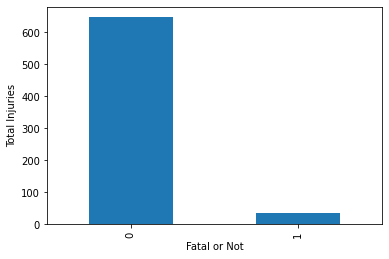

In [ ]:
## The targte variable has huge class imbalance. And we can fix this issue using Oversampling technquire
df1['Fatal_Prediction'].value_counts().plot(kind='bar')
plt.xlabel("Fatal or Not")
plt.ylabel("Total Injuries")
plt.xticks()
plt.show()

In [ ]:
# SPlit the dataframe into X and Y ..X is the depednet and Y is independent variable
X = df1.iloc[:, :-1]
Y = df1.iloc[:, -1]
# Save the columns name in X_columns variable
X_Columns = list(X.columns)
print(X_Columns)
len(X_Columns)

['New_Age', 'automobile', 'truck', 'Weekday', 'Major Arterial_road_class', 'Minor Arterial_road_class', 'Intersection_intersection', 'Mid-Block_intersection', 'No Control_traffic_control', 'Traffic Signal_traffic_control', 'Clear_visibility', 'Rain_visibility', 'Daylight_light', 'Dark, artificial_light', 'Normal_cyccond', 'Inattentive_cyccond', 'HourRange_Hour 12 to 15', 'HourRange_Hour 16 to 19', 'HourRange_Hour 20 to 23', 'HourRange_Hour 4 to 7', 'HourRange_Hour 8 to 11', 'district_North York', 'district_Scarborough', 'district_Toronto and East York', 'district_unknown', 'Season_Spring', 'Season_Summer', 'Season_Winter']


28

**Split the data into Train and Test sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=101)
print(f"X Train shape {X_train.shape}")
print(f"X Test shape {X_test.shape}")
print(f"y Train shape {y_train.shape}")
print(f"y Test shape {y_test.shape}")

X_train.head(2)

X Train shape (513, 28)
X Test shape (171, 28)
y Train shape (513,)
y Test shape (171,)


,New_Age,automobile,truck,Weekday,Major Arterial_road_class,Minor Arterial_road_class,Intersection_intersection,Mid-Block_intersection,No Control_traffic_control,Traffic Signal_traffic_control,Clear_visibility,Rain_visibility,Daylight_light,"Dark, artificial_light",Normal_cyccond,Inattentive_cyccond,HourRange_Hour 12 to 15,HourRange_Hour 16 to 19,HourRange_Hour 20 to 23,HourRange_Hour 4 to 7,HourRange_Hour 8 to 11,district_North York,district_Scarborough,district_Toronto and East York,district_unknown,Season_Spring,Season_Summer,Season_Winter
617,37.0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
336,22.0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
## 
from imblearn.over_sampling import SMOTENC
#sm = SMOTE(random_state = 12, ratio=0.25)
os = SMOTENC(sampling_strategy=0.25, categorical_features=range(1,X_train.shape[1]), random_state = 12)
X_train_res, y_train_res = os.fit_sample(X_train,y_train)
print(f"X Train shape after sampling {X_train_res.shape}")
print(f"y train shape after sampling  {y_train_res.shape}")


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


X Train shape after sampling (603, 28)
y train shape after sampling  (603,)


In [ ]:
## Check the Y column (which is Fatal_prediction).. Y column should have balanced 1's and 0's (1 is to 4 ratio)
X_train_res.shape, y_train_res.shape
import collections as cl
cl.Counter(y_train_res)

Counter({0: 483, 1: 120})

# Model Building 

**Import Logistic model function and train the data on training set in the model**


In [ ]:
### Putting the X_train_res1 array into a dataframe..in order to have a clear column label
X_train_res_df=pd.DataFrame(data=X_train_res, index=range(0,X_train_res.shape[0]), columns=X_Columns)
X_train_res_df.head(2)
print(X_train_res_df.shape)

(603, 28)


In [ ]:
### Add constatnt in X for the intercept
import statsmodels.tools as c
X_train_res_df = c.add_constant(X_train_res_df)
X_test = c.add_constant(X_test)

In [ ]:
from statsmodels.discrete import discrete_model as sm
model = sm.Logit(y_train_res,X_train_res_df)
result = model.fit()
print(result.summary())
##** The model is giving error "Perfect separation detected, results not available".
## we may have some variables which are highly imbalanced..Drop highly imbalanced variables

         Current function value: 0.227232
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  603
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                           28
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5446
Time:                        18:41:36   Log-Likelihood:                -137.02
converged:                      False   LL-Null:                       -300.91
Covariance Type:            nonrobust   LLR p-value:                 7.156e-53
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -20.8478   5.04e+05  -4.14e-05      1.000   -9.87e+05    9.87e+05
New_A

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Calculating the Accuracy of the Model by testing on the test data set 

In [ ]:
## Y prediction based on the test set
y_test_pred = result.predict(X_test)
# Covert prediction probality to 0 or 1
y_prediction = np.where(y_test_pred> 0.5, 1, 0)

In [ ]:
## Model accuracy evaluation  #####
from sklearn import metrics
print(f"Accuracy Score   :  {metrics.accuracy_score(y_test,y_prediction)}")
## Confusion matrix
print(f"\nConfusion matrix : \n {metrics.confusion_matrix(y_test,y_prediction)}")
## Prescision score
print(f"\nPrecision Score  :  {metrics.precision_score(y_test,y_prediction)}")
## Recall Score
print(f"\nRecall Score     :  {metrics.recall_score(y_test,y_prediction)}")

Accuracy Score   :  0.9298245614035088

Confusion matrix : 
 [[156   8]
 [  4   3]]

Precision Score  :  0.2727272727272727

Recall Score     :  0.42857142857142855


**Drop the insignificant variables as per the result**

In [ ]:
### List of vaiables to be dropped with p-value > 0.5
Significant_variable =['const','New_Age','automobile','Major Arterial_road_class','Dark','artificial_light','Normal_cyccond','Inattentive_cyccond', \
'HourRange_Hour 12 to 15','HourRange_Hour 16 to 19','HourRange_Hour 20 to 23','HourRange_Hour 4 to 7','HourRange_Hour 8 to 11',\
'district_North York','district_Scarborough','district_Toronto and East York','Season_Spring','Season_Summer']
drop=set(X_train_res_df.columns) - set(Significant_variable)
X_train_res_df1 = X_train_res_df.drop(drop, axis=1)
## update the X_test1 
X_test1 = X_test.drop(drop, axis=1)

In [ ]:
X_train_res_df1.columns

Index(['const', 'New_Age', 'automobile', 'Major Arterial_road_class',
       'Normal_cyccond', 'Inattentive_cyccond', 'HourRange_Hour 12 to 15',
       'HourRange_Hour 16 to 19', 'HourRange_Hour 20 to 23',
       'HourRange_Hour 4 to 7', 'HourRange_Hour 8 to 11',
       'district_North York', 'district_Scarborough',
       'district_Toronto and East York', 'Season_Spring', 'Season_Summer'],
      dtype='object')

In [ ]:
## train the logistic reg model on new set of X variables
from statsmodels.discrete import discrete_model as sm
model2 = sm.Logit(y_train_res,X_train_res_df1)
result2 = model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.265460
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  603
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                           15
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.4680
Time:                        18:41:36   Log-Likelihood:                -160.07
converged:                       True   LL-Null:                       -300.91
Covariance Type:            nonrobust   LLR p-value:                 3.551e-51
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.3743      0.765      1.796     

Calculating the Accuracy of the Model by testing on the test data set 

In [ ]:
## Y prediction based on the test set
y_test_pred1 = result2.predict(X_test1)
# Covert prediction probality to 0 or 1
y_prediction1 = np.where(y_test_pred1> 0.5, 1, 0)

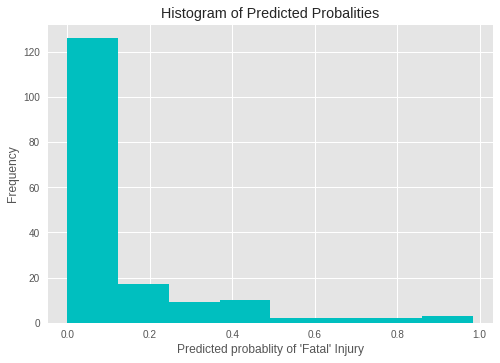

In [251]:
### Probablity Density 
plt.hist(y_test_pred1, bins=8, color='c')
plt.title("Histogram of Predicted Probalities")
plt.xlabel("Predicted probablity of 'Fatal' Injury")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## Model accuracy evaluation  #####
from sklearn import metrics
print(f"Accuracy Score   :  {metrics.accuracy_score(y_test,y_prediction1)}")
## Confusion matrix
print(f"\nConfusion matrix : \n {metrics.confusion_matrix(y_test,y_prediction1)}")
## Prescision score
print(f"\nPrecision Score  :  {metrics.precision_score(y_test,y_prediction1)}")
## Recall Score
print(f"\nRecall Score     :  {metrics.recall_score(y_test,y_prediction1)}")

Accuracy Score   :  0.9415204678362573

Confusion matrix : 
 [[158   6]
 [  4   3]]

Precision Score  :  0.3333333333333333

Recall Score     :  0.42857142857142855


# Exponenitate the model results

In [ ]:
result2.params

const                             1.374255
New_Age                           0.044640
automobile                       -1.667824
Major Arterial_road_class         1.684399
Normal_cyccond                   -1.321668
Inattentive_cyccond              -3.213161
HourRange_Hour 12 to 15          -2.120780
HourRange_Hour 16 to 19          -4.020454
HourRange_Hour 20 to 23          -2.761521
HourRange_Hour 4 to 7            -3.044285
HourRange_Hour 8 to 11           -1.899988
district_North York              -2.187495
district_Scarborough             -2.134857
district_Toronto and East York   -1.193579
Season_Spring                    -0.738592
Season_Summer                    -1.718764
dtype: float64

In [ ]:
result2.conf_int()

,0,1
const,-0.125325,2.873835
New_Age,0.025024,0.064256
automobile,-2.329275,-1.006374
Major Arterial_road_class,0.881146,2.487652
Normal_cyccond,-1.972014,-0.671321
Inattentive_cyccond,-5.306350,-1.119971
HourRange_Hour 12 to 15,-3.065291,-1.176270
HourRange_Hour 16 to 19,-5.219028,-2.821881
HourRange_Hour 20 to 23,-3.913033,-1.610009
HourRange_Hour 4 to 7,-4.552048,-1.536522


In [ ]:
coefs_exped = np.exp(result2.params)

In [ ]:
CIs_exped = np.exp(result2.conf_int())

In [273]:
CIs_exped["coef"] = coefs_exped
CIs_exped.columns = ["2.5% CI", "97.5% CI", "coef"]
CIs_exped1 = CIs_exped.iloc[1:-1, :]
CIs_exped1

,2.5% CI,97.5% CI,coef
New_Age,1.025340,1.066365,1.045651
automobile,0.097366,0.365542,0.188657
Major Arterial_road_class,2.413664,12.032994,5.389212
Normal_cyccond,0.139176,0.511033,0.266690
Inattentive_cyccond,0.004960,0.326289,0.040229
HourRange_Hour 12 to 15,0.046640,0.308427,0.119938
HourRange_Hour 16 to 19,0.005413,0.059494,0.017945
HourRange_Hour 20 to 23,0.019980,0.199886,0.063196
HourRange_Hour 4 to 7,0.010546,0.215128,0.047630
HourRange_Hour 8 to 11,0.054869,0.407724,0.149570


In [274]:
error=np.transpose(np.array(CIs_exped1.loc[:,['2.5% CI','97.5% CI']]))
error

array([[1.02533963e+00, 9.73663484e-02, 2.41366448e+00, 1.39176277e-01,
        4.95999747e-03, 4.66402815e-02, 5.41258885e-03, 1.99798037e-02,
        1.05455853e-02, 5.48687636e-02, 2.98567969e-02, 3.28087842e-02,
        1.40602856e-01, 2.44250713e-01],
       [1.06636482e+00, 3.65542032e-01, 1.20329944e+01, 5.11032834e-01,
        3.26289174e-01, 3.08427041e-01, 5.94939518e-02, 1.99885883e-01,
        2.15128058e-01, 4.07723613e-01, 4.21621436e-01, 4.26281414e-01,
        6.53545584e-01, 9.34611740e-01]])

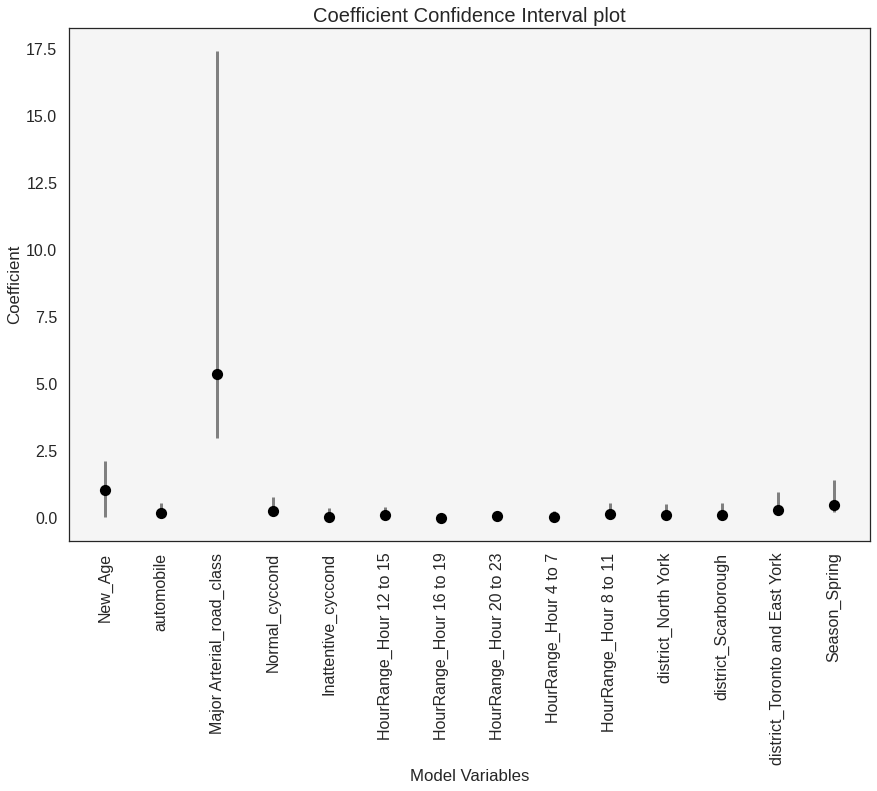

In [331]:
plt.style.use('seaborn-white')
axes=plt.errorbar(x=CIs_exped1.index, y=CIs_exped1.coef, yerr=error, fmt='ok',\
             ecolor='gray', elinewidth=3, capsize=0)
plt.xlabel("Model Variables")
plt.ylabel("Coefficient")
plt.title("Coefficient Confidence Interval plot")
plt.xticks()
axes = plt.gca()
plt.setp(axes.get_xticklabels(), rotation = 90)
axes.set_facecolor('#F5F5F5')
#axes.set_facecolor((204, 229, 255))
plt.show()

# Illustrating the Odds Ratio Mentioned in Email Using figure from Original Summary

In [ ]:
1/np.exp(-3.8261)

45.88324418575068

In [ ]:
np.exp(2.0476)

7.749280497320312

In [ ]:
result2.llr_pvalue

3.5510371298202444e-51

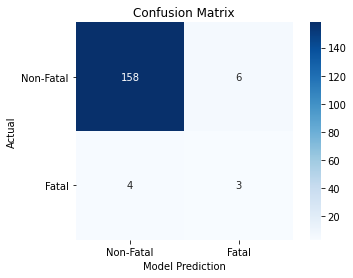

In [ ]:
## Confusion Matrix
confu =metrics.confusion_matrix(y_test,y_prediction1)
import seaborn as sns
axes = sns.heatmap(confu, square=True, annot=True, fmt='d', cbar=True,cmap=plt.cm.Blues)
Class_label = ['Non-Fatal', 'Fatal']
axes.set_xlabel('Model Prediction')
axes.set_ylabel('Actual')

tick_marks = np.arange(len(Class_label)) + 0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(Class_label, rotation=0)

axes.set_yticks(tick_marks)
axes.set_yticklabels(Class_label, rotation=0)

axes.set_title('Confusion Matrix')
plt.show()

In [ ]:
import collections
collections.Counter(y_test)

Counter({0: 164, 1: 7})

In [ ]:
# TP, FP, TN, FN
y_test,y_prediction1
tp = sum((y_test==1) & (y_prediction1==1))
fp = sum((y_test==0) & (y_prediction1==1))
tn = sum((y_test==0) & (y_prediction1==0))
fn = sum((y_test==1) & (y_prediction1==0))

print(f"True Positive {tp}")
print(f"False Positive {fp}")
print(f"True Negative {tn}")
print(f"False Negative {fn}")

True Positive 3
False Positive 6
True Negative 158
False Negative 4


In [ ]:
metrics.f1_score(y_test,y_prediction1)

0.375

In [224]:
# Prediction probality
# Random probality
r_probs = [0 for _ in range(len(y_test))]


In [229]:
## Auc values
r_auc = roc_auc_score(y_test, r_probs)
rlogistic_auc = roc_auc_score(y_test, y_prediction1)
print(r_auc)
print(rlogistic_auc)

0.5
0.695993031358885


In [233]:
## ROC curve values
from sklearn.metrics import roc_curve, roc_auc_score
logistic_fpr, logistic_tpr, threshol = roc_curve(y_test,y_prediction1)
r_fpr, r_tpr, threshol = roc_curve(y_test,r_probs)

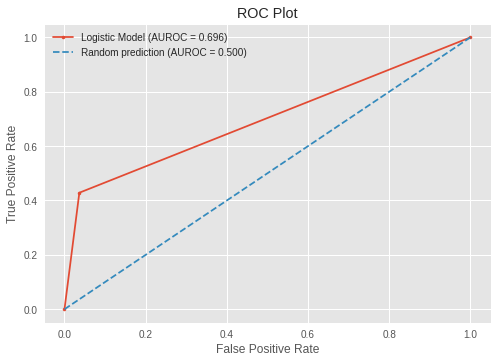

In [244]:
plt.style.use('ggplot')
plt.plot(logistic_fpr, logistic_tpr,marker='.' , label='Logistic Model (AUROC = %0.3f)' % rlogistic_auc)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()